In [186]:
import sys
import os
spr_path = "/Users/Dixit/Documents/Studies/CU_Boulder/sem3/Independent_study/code/SpringRank/python"
sys.path.append(os.path.abspath(spr_path))
import SpringRank_tools as SR
import csv
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
import networkx as nx
import numpy as np
import SpringRank_tools as sr
import tools as tl

In [231]:
def getGraph(indj):
    G = tl.build_graph_from_adjacency(indj)
    return G;

def graphProp(G):
    n=len(G.nodes)
    e=len(G.edges)
    print('no. of nodes= {0}, no. of edges= {1}'.format(n,e))

In [232]:
def formatChessFile(source,destination):
    with open(source,'r') as chess, open(destination, 'w') as out:
        chess = csv.reader(chess, delimiter=' ')
        writer = csv.writer(out, delimiter=' ')
        for row in chess:
            if '%' not in row:
                line=[]
                result = row[2].split('\t')
                if(result[0] == '1'):
                    line = [row[0],row[1],1]
                elif(result[0] == '-1'):
                    line = [row[1],row[0],1]
                if line:
                    writer.writerow(line)


def getChessGraphData(to_format):
    source = '../data/US_CS_adjacency.dat'
    destination = '../data/output_US_CS_adjacency.data'
    if to_format: formatChessFile(source,destination)
    return getGraph(destination)
    


In [233]:
G_US = getGraph('../data/US_CS_adjacency.dat');
G_chess = getChessGraphData(False);

In [234]:
def run(G,alpha,l0,l1):
    nodes=list(G.nodes())			#  determines the order of the entries of matrix A
    A=nx.to_numpy_matrix(G,nodelist=nodes)
    '''
    Extracts SpringRank
    '''
    rank=sr.SpringRank(A,alpha=alpha,l0=l0,l1=l1)
    rank=tl.shift_rank(rank)   # (optional) shifts so that the min is in zero and the others are positive
    '''
    Order results so that the first node is the highest-ranked one
    '''
    sorted_tuples=[(nodes[i],rank[i]) for i in range(G.number_of_nodes())]
    #ordered_x= sorted(rank, key=lambda tup: int(tup[0]),reverse=False)
    return rank,sorted_tuples

def save(sorted_tuples,G,file):
    '''
    Prints results
    '''
    print('SpringRank scores:')
    outfile='../data/'+file+'_SpringRank_'+'a'+str(alpha)+'_l0_'+str(l0)+'_l1_'+str(l1)+'.dat'
    outf=open(outfile,'w')

    for i in range(G.number_of_nodes()):
        outf.write("{} {}\n".format(sorted_tuples[i][0],sorted_tuples[i][1]))
        # print nodes[i],rank[i]
        #print(X[i][0],X[i][1])
    print('Results saved in:', outfile)
    outf.close()
    


In [235]:
alpha=0.
l0=0.
l1=1.    
us_rank,us_tuples = run(G_US,alpha,l0,l1)
save(us_tuples,G_US,'G_US')

SpringRank scores:
Results saved in: ../data/G_US_SpringRank_a0.0_l0_0.0_l1_1.0.dat


In [244]:
def getEqn39(start,end,step):
    x = np.arange(start,end,step)
    y=[]
    for xi in x:
        y.append(tl.eqs39(xi,rank,A))
    return x,y

def eqn39SimplePlot(save):
    x,y = getEqn39(0.1,20,0.1);
    plt.plot(x,y)
    plt.title('Eqn 39 :'+save)
    if save:
        plt.savefig('../data/'+save+'.svg')

def prediction(beta,_scores):
    preds = {}
    for i in range(len(_scores)):
        for j in range(i+1,len(_scores)):
            preds[(i,j)] = 1/(1+np.exp(-2*beta*(_scores[i]-_scores[j])))
    return preds
    

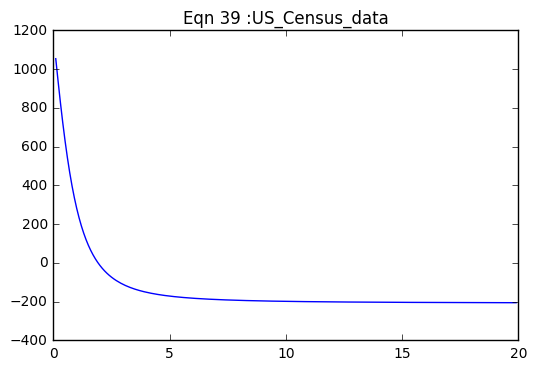

In [245]:
eqn39SimplePlot(save='US_Census_data')

In [246]:
A_US = nx.to_numpy_matrix(G_US,nodelist=list(G_US.nodes))
us_beta=tl.get_optimal_temperature(us_rank,A_US)
print('Beta value for US census data {0}'.format(us_beta))

Beta value for US census data 1.9207997505386918


In [247]:
us_preds = prediction(us_beta,us_rank)

{(151, 197): 0.41995612975306928,
 (158, 193): 0.48060375312239229,
 (90, 187): 0.18557909760807562,
 (143, 183): 0.96737849949181864,
 (0, 175): 0.21957398655484353,
 (110, 190): 0.99904606900689974,
 (147, 176): 0.036052732460422815,
 (20, 162): 0.0028200885464702476,
 (39, 70): 0.2988626154080618,
 (5, 178): 0.24055834638668375,
 (88, 147): 0.12298620916968706,
 (9, 183): 0.93030273793960105,
 (63, 76): 0.30960399880193523,
 (111, 196): 0.18263295980169181,
 (29, 44): 0.60940099817362736,
 (67, 137): 0.91904447457538674,
 (33, 41): 0.99688961254073905,
 (53, 166): 0.16689392589897015,
 (57, 163): 0.94710858767506789,
 (76, 201): 0.012928751781139938,
 (135, 199): 0.82422355863989027,
 (5, 195): 0.059688288832418175,
 (108, 199): 0.9982725488116031,
 (96, 153): 0.95726057165977729,
 (119, 165): 0.5795097042178875,
 (104, 130): 0.23973717885925233,
 (123, 174): 0.97542974070573985,
 (109, 118): 0.91560174806396932,
 (33, 154): 0.99853219933163451,
 (52, 98): 0.72621030486182103,
 (15,